* <a href="#Q-Q-Plots">Q-Q Plots</a>
  * <a href="#Q-Q-Plots-for-13-pg-tissue">Q-Q Plots for 13 pg tissue</a>
  * <a href="#Q-Q-Plots-for-10-ng-tissue">Q-Q- Plots for 10 ng tissue</a>
  * <a href="#What-does-a-Q-Q-plot-look-like-for-a-normal-distribution">Q-Q plot of a normal distribution</a>
  * <a href="#What-does-a-Q-Q-Plot-look-for-a-uniform-distribution">Q-Q plot of a uniform distribution</a>
  * <a href="#What-does-a-Q-Q-plot-look-like-for-lognormal">Q-Q plot of a log normal distribution</a>
  * <a href="#What-does-a-Q-Q-plot-look-like-for-power-a=2">Q-Q plot of power a=2 distribution</a>

In [1]:
from __future__ import print_function, division

import pandas
import numpy
import scipy.stats
import collections

from matplotlib import pyplot
import matplotlib

In [2]:
%matplotlib inline

In [3]:
store = pandas.HDFStore('comparison.h5', 'r')
bulk_cell_line_fpkms = store.get('/bulk_cell_line/fpkms')
bulk_cell_line_scores = store.get('/bulk_cell_line/fpkm_scores')
bulk_cell_line_labels = store.get('/bulk_cell_line/labels')
pool_split_fpkms = store.get('/c57bl6_purk_pool_split/fpkms')
pool_split_scores = store.get('/c57bl6_purk_pool_split/fpkm_scores')
tissue_10ng_fpkms = store.get('/tissue_10ng/fpkms')
tissue_10ng_scores = store.get('/tissue_10ng/fpkm_scores')
tissue_10ng_labels = store.get('/tissue_10ng/labels')
tissue_13pg_fpkms = store.get('/tissue_13pg/fpkms')
tissue_13pg_scores = store.get('/tissue_13pg/fpkm_scores')
tissue_13pg_labels = store.get('/tissue_13pg/labels')
store.close()

In [4]:
from statsmodels.graphics import gofplots

def all_qq_plots(fpkms, labels):
    cols = 2
    rows = int(len(fpkms.columns)/cols)
    fig, ax = pyplot.subplots(rows, cols, figsize=(cols * 4 , rows * 4))
    for i, col in enumerate(fpkms):
        cax = ax[i // cols][i % cols]
        gofplots.qqplot(fpkms[col], line='q', ax=cax)
        cax.set_title(labels[col])

## Q-Q Plots for 13 pg tissue

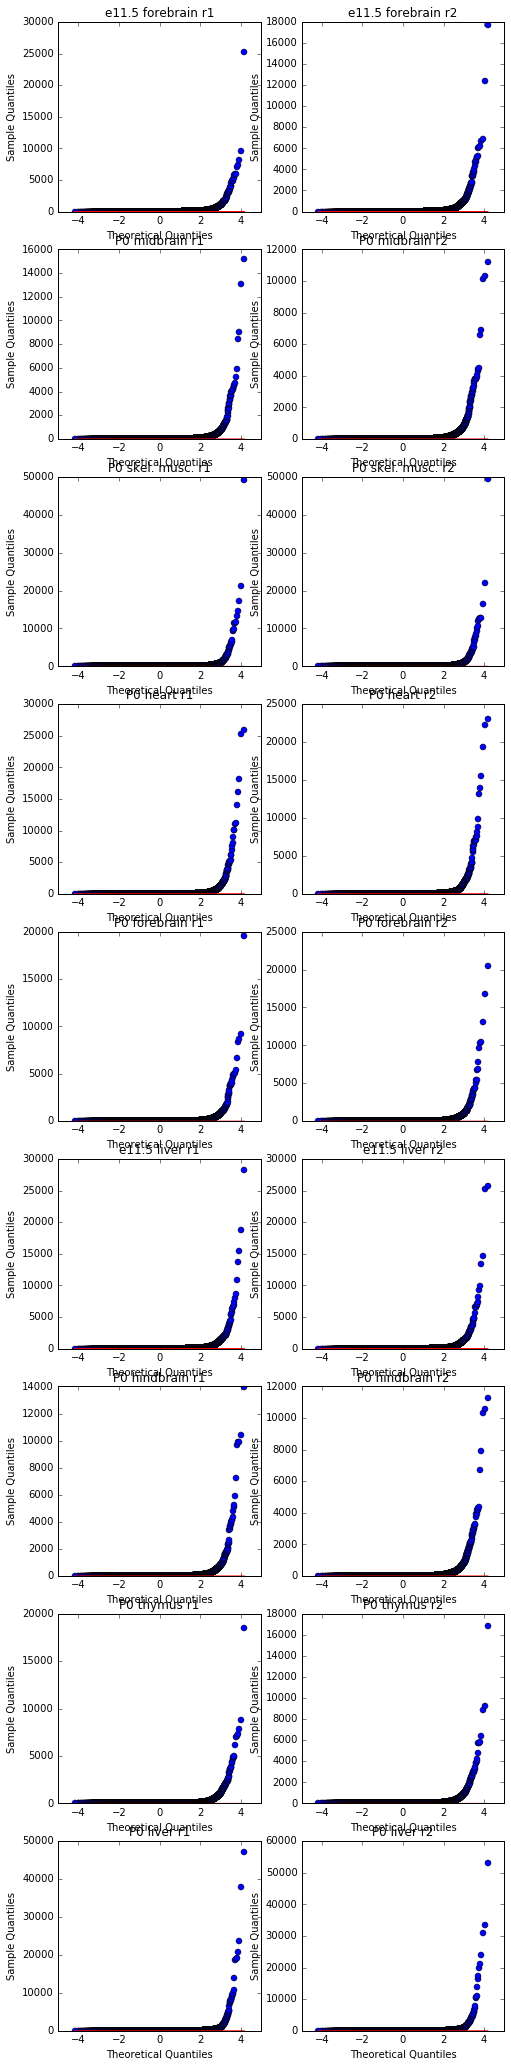

In [5]:
all_qq_plots(tissue_13pg_fpkms, tissue_13pg_labels)

##Q-Q Plots for 10 ng tissue

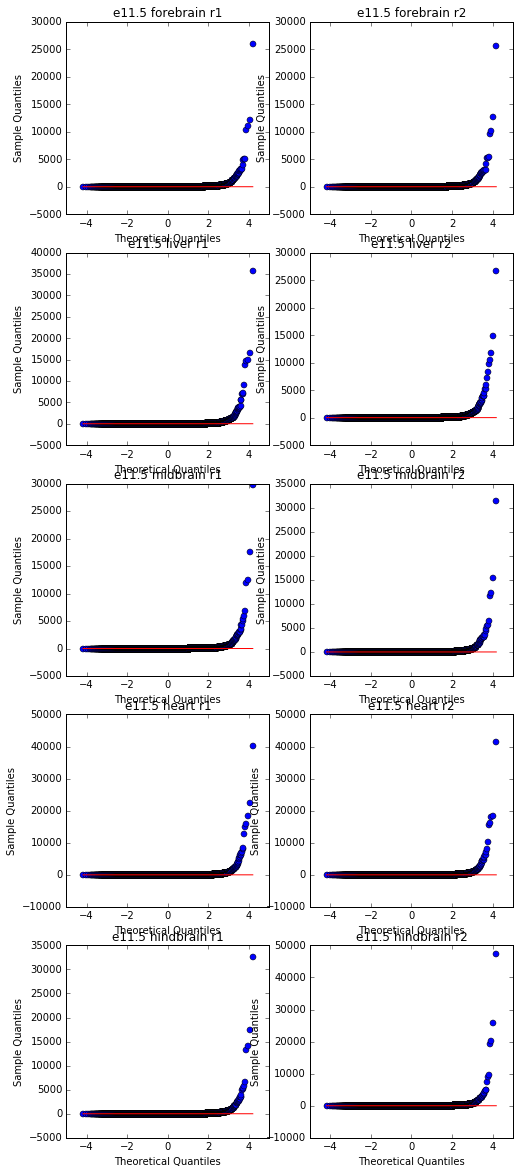

In [6]:
all_qq_plots(tissue_10ng_fpkms, tissue_10ng_labels)    

## What does a Q-Q plot look like for a normal distribution

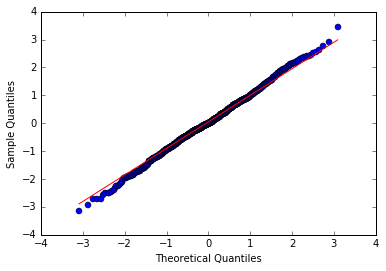

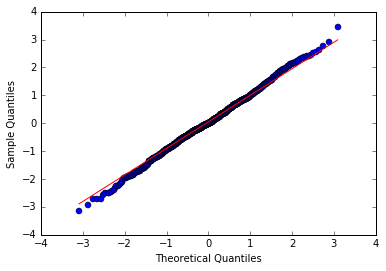

In [7]:
gofplots.qqplot(numpy.random.normal(size=1000), line='q')

## What does a Q-Q Plot look for a uniform distribution

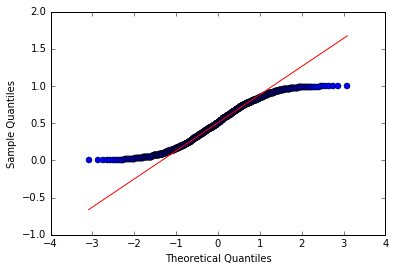

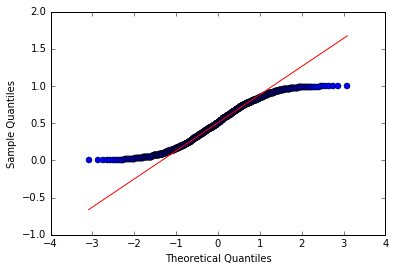

In [8]:
gofplots.qqplot(numpy.random.uniform(size=1000), line='q')

## What does a Q-Q plot look like for lognormal

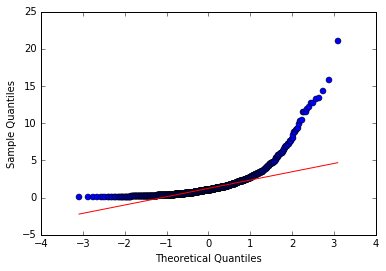

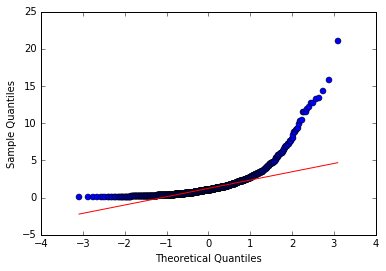

In [9]:
gofplots.qqplot(numpy.random.lognormal(size=(1000)), line='q')

## What does a Q-Q plot look like for power a=2

(a=1 looked like the uniform distribution)

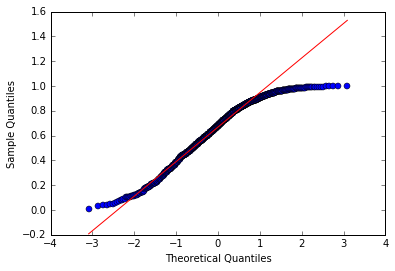

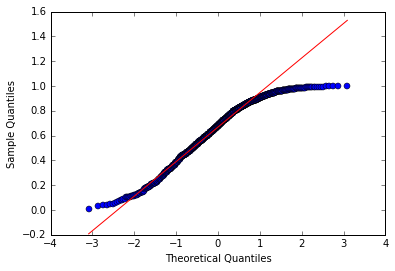

In [10]:
gofplots.qqplot(numpy.random.power(a=2, size=(1000)), line='q')

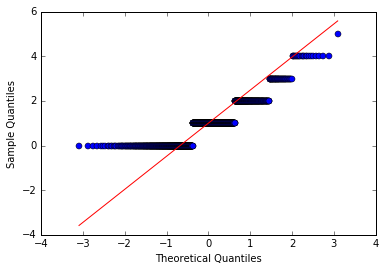

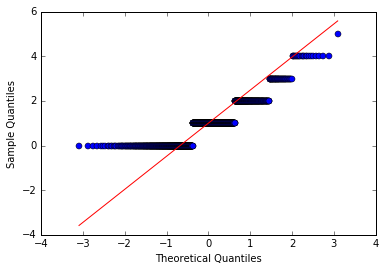

In [11]:
gofplots.qqplot(numpy.random.poisson(size=(1000)), line='q')

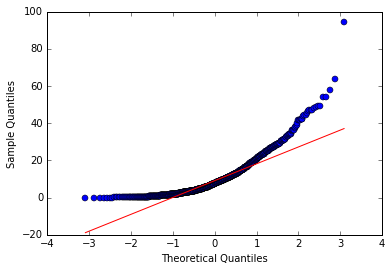

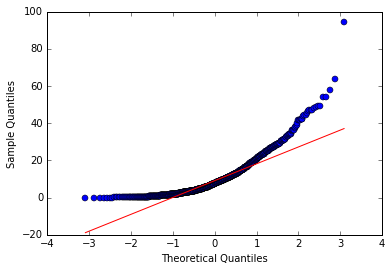

In [12]:
gofplots.qqplot(numpy.random.exponential(scale=10, size=(1000)), line='q')

After plotting various distributions, from the perspective of the Q-Q plot it looks like our raw FPKM scores most closely resemble lognormal (with exponential being another possibility)